<a href="https://colab.research.google.com/github/joungminhee/project/blob/master/churn_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = '/content/drive/MyDrive/Data/Churn_Modelling.csv'
df = pd.read_csv(data)

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
df.CreditScore.unique() # 앞번호대로 구간화 / age도 구간화해야징~!

In [8]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
df.describe(include='object')
# 스미스 이름 빈도수가 32개나 됨

# 데이터 탐색

In [ ]:
sns.boxplot(data=df['Balance'])
plt.show() 
# 이상치 없음 확인

In [ ]:
sns.boxplot(data=df['EstimatedSalary'])
plt.show() 

In [40]:
df.groupby('Exited')['Gender'].value_counts()

Exited  Gender
0       Male      4559
        Female    3404
1       Female    1139
        Male       898
Name: Gender, dtype: int64

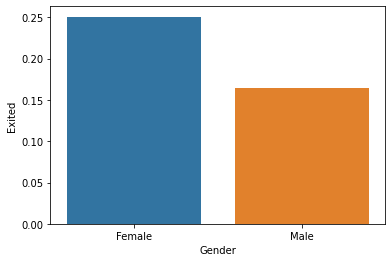

In [44]:
sns.barplot(x=df['Gender'], y=df['Exited'], data=df,ci=None)
plt.show()
# 남자가 여자보다 이탈율이 높음

In [ ]:
sns.barplot(x= 'Geography', y="Exited", data=df, ci=None)
plt.show()
# 독일 이탈율이 프랑스와 스페인보다 높음 확인

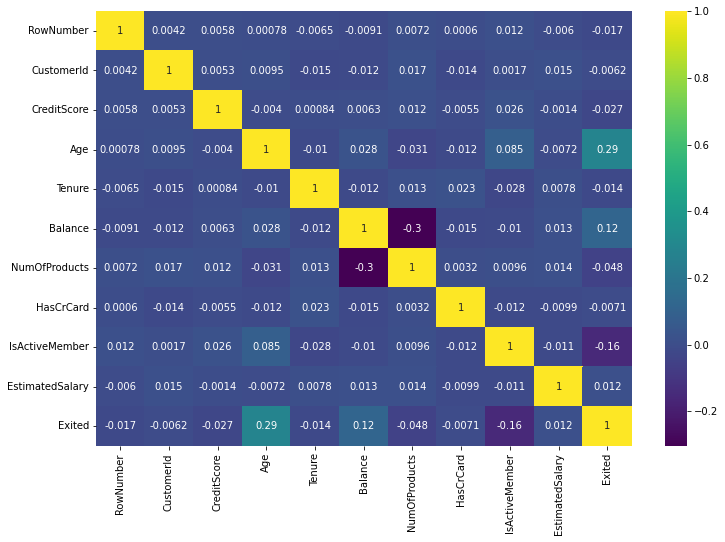

In [50]:
plt.figure(figsize=(12,8))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap='viridis')
plt.show()
# 이탈율 상관관계 그래프

In [66]:
# 회사와 오래 있었던 사람들의 이탈율 확인
df.groupby('Exited')['Tenure'].value_counts()

Exited  Tenure
0       7         851
        2         847
        8         828
        1         803
        5         803
        3         796
        4         786
        6         771
        9         771
        10        389
        0         318
1       1         232
        3         213
        9         213
        5         209
        4         203
        2         201
        8         197
        6         196
        7         177
        10        101
        0          95
Name: Tenure, dtype: int64

## 데이터 전처리

### 원핫인코딩

### Age, Creedit_score 구간화

### 필요없는 컬럼 제거

In [51]:
df = df.drop(columns='RowNumber')

In [52]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 종속변수 생성

In [ ]:
# y = df.pop['Exited'].values.copy()

## 데이터 모델링